In [2]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [3]:
with open('intents.json') as file:
    data = json.load(file)
    
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [4]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [5]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)


In [8]:
from keras.models import Sequential
from keras.layers import Embedding, GlobalAveragePooling1D, Dense

# Define your model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))  # Remove input_length here
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))

# Calculate the actual number of classes in your dataset
num_classes = len(set(training_labels))

# Add output layer
model.add(Dense(num_classes, activation='softmax'))

# Compile your model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()

# Train your model
epochs = 500
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0632 - loss: 3.6377
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0482 - loss: 3.6334     
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0378 - loss: 3.6296     
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0494 - loss: 3.6259 
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0627 - loss: 3.6213 
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0617 - loss: 3.6126 
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0694 - loss: 3.5953 
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0598 - loss: 3.5875 
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0529 - loss: 3.5686 
Epoch 10/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0516 - loss: 3.5573 
Epoch 11/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0859 - loss: 3.5216 
Epoch 12/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

In [9]:
import pickle

# Save the trained model with a .h5 extension
model.save("chat_model.h5")

# Save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# Save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)


In [10]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model.h5')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!


User: quit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


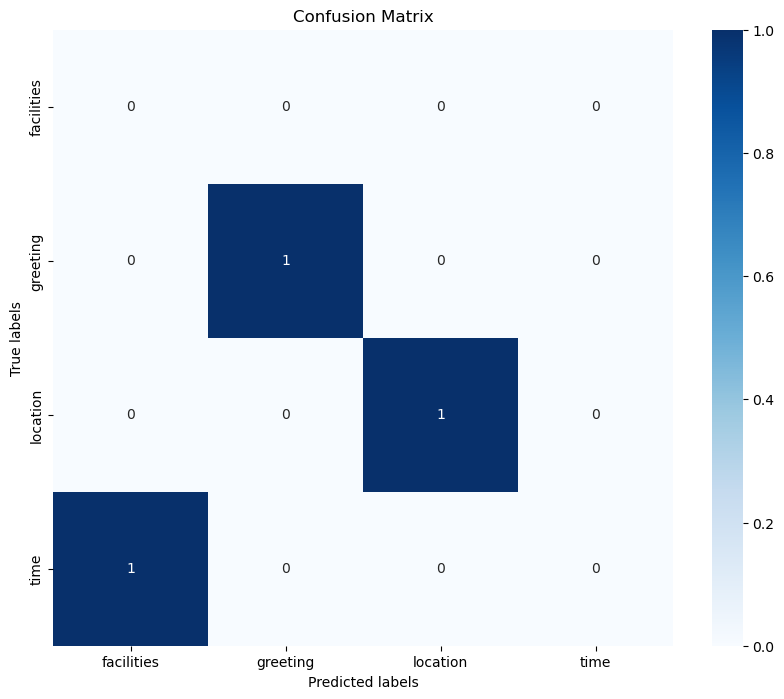

In [11]:
import numpy as np
import json
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load intents and models
with open("intents.json") as file:
    data = json.load(file)

# Load trained model
model = keras.models.load_model('chat_model.h5')

# Load tokenizer object
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load label encoder object
with open('label_encoder.pickle', 'rb') as enc:
    lbl_encoder = pickle.load(enc)

# Parameters
max_len = 20


test_sentences = ["How are you?", "What time is it?", "Where are you located?"]
test_labels = ["greeting", "time", "location"]

# Tokenize and pad test sentences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = keras.preprocessing.sequence.pad_sequences(test_sequences, truncating='post', maxlen=max_len)

# Make predictions on the test set
test_predictions = model.predict(padded_test_sequences)

# Get the predicted labels
predicted_labels = np.argmax(test_predictions, axis=1)
predicted_labels = lbl_encoder.inverse_transform(predicted_labels)

# Get the list of unique labels
labels = np.unique(np.concatenate((test_labels, predicted_labels)))

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels, labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [35]:
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox
import numpy as np
from tensorflow import keras
import json
import pickle

# Load intents and models
with open("intents.json") as file:
    data = json.load(file)

model = keras.models.load_model('chat_model.h5')
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)
with open('label_encoder.pickle', 'rb') as enc:
    lbl_encoder = pickle.load(enc)

# Parameters
max_len = 20

# Function to get response from the chatbot
def get_response():
    user_input = user_input_text.get("1.0",'end-1c')
    user_input_text.delete("1.0",'end')

    if user_input.lower() == "quit":
        root.destroy()
        return

    result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([user_input]),
                                         truncating='post', maxlen=max_len))
    tag = lbl_encoder.inverse_transform([np.argmax(result)])

    for i in data['intents']:
        if i['tag'] == tag:
            response = np.random.choice(i['responses'])
            chat_history_text.configure(state='normal')
            chat_history_text.insert(tk.END, "You: " + user_input + "\n", "user")
            chat_history_text.insert(tk.END, "ChatBot: " + response + "\n", "bot")
            chat_history_text.configure(state='disabled')
            chat_history_text.yview(tk.END)

# GUI setup
root = tk.Tk()
root.title("Simple Chatbot")

frame = tk.Frame(root)
frame.pack(pady=10)

chat_history_text = scrolledtext.ScrolledText(frame, height=20, width=50)
chat_history_text.grid(row=0, column=0, padx=5, pady=5, columnspan=2)
chat_history_text.tag_config("user", foreground="blue")
chat_history_text.tag_config("bot", foreground="green")
chat_history_text.configure(state='disabled')

user_input_text = tk.Text(frame, height=3, width=50)
user_input_text.grid(row=1, column=0, padx=5, pady=5)

send_button = tk.Button(frame, text="Send", command=get_response)
send_button.grid(row=1, column=1, padx=5, pady=5)

root.mainloop()


JSONDecodeError: Invalid \escape: line 308 column 77 (char 7715)

In [32]:
import numpy as np
import json
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load intents and models
with open("intents.json") as file:
    data = json.load(file)

# Load trained model
model = keras.models.load_model('chat_model.h5')

# Load tokenizer object
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Load label encoder object
with open('label_encoder.pickle', 'rb') as enc:
    lbl_encoder = pickle.load(enc)

# Parameters
max_len = 20

# Initialize an empty list to store test sentences and labels
test_sentences = []
test_labels = []

# Extract test sentences and labels from the first 1000 examples of the dataset
for example in data[:1000]:
    test_sentences.append(example['text'])
    test_labels.append(example['label'])

# Tokenize and pad test sentences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
padded_test_sequences = keras.preprocessing.sequence.pad_sequences(test_sequences, truncating='post', maxlen=max_len)

# Get the list of unique labels
labels = lbl_encoder.classes_

# Make predictions on the test data
test_predictions = model.predict(padded_test_sequences)
predicted_labels = np.argmax(test_predictions, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, labels[predicted_labels], labels=labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


TypeError: unhashable type: 'slice'

In [29]:
import json
import pickle
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Load new data
with open("new_intents.json") as file:
    new_data = json.load(file)
# Check Label Encoder Classes
print("Label Encoder Classes:", lbl_encoder.classes_)

# Preprocess data
new_training_sentences = []
new_training_labels = []
for intent in new_data['intents']:
    for pattern in intent['text']:
        new_training_sentences.append(pattern)
        new_training_labels.append(intent['intent'])

# Check for any new labels in the training data
new_labels_set = set(new_training_labels)
existing_labels_set = set(lbl_encoder.classes_)
new_labels = new_labels_set - existing_labels_set
if new_labels:
    print("New labels found:", new_labels)

# Tokenize and pad new training sentences
new_sequences = tokenizer.texts_to_sequences(new_training_sentences)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_len, padding='post')

# Encode new training labels using the existing label encoder
new_encoded_labels = lbl_encoder.transform(new_training_labels)

# Define model architecture
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train model
epochs = 10
history = model.fit(new_padded_sequences, new_encoded_labels, epochs=epochs)

# Evaluate model
loss, accuracy = model.evaluate(new_padded_sequences, new_encoded_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Save model and preprocessing objects
model.save("retrained_chat_model.h5")
with open('retrained_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('retrained_label_encoder.pickle', 'wb') as enc_file:
    pickle.dump(lbl_encoder, enc_file, protocol=pickle.HIGHEST_PROTOCOL)



Label Encoder Classes: ['admission' 'canteen' 'college intake' 'committee' 'computerhod' 'course'
 'creator' 'document' 'event' 'extchod' 'facilities' 'fees' 'floors'
 'goodbye' 'greeting' 'hod' 'hostel' 'hours' 'infrastructure' 'ithod'
 'library' 'location' 'menu' 'name' 'number' 'placement' 'principal'
 'ragging' 'random' 'salutaion' 'scholarship' 'sem' 'sports' 'swear'
 'syllabus' 'task' 'uniform' 'vacation']
New labels found: {'CourtesyGreetingResponse', 'Shutup', 'PodBayDoor', 'WhoAmI', 'Greeting', 'CourtesyGoodBye', 'RealNameQuery', 'NameQuery', 'Thanks', 'CurrentHumanQuery', 'NotTalking2U', 'SelfAware', 'TimeQuery', 'GoodBye', 'Gossip', 'UnderstandQuery', 'PodBayDoorResponse', 'CourtesyGreeting', 'GreetingResponse', 'Jokes', 'Swearing', 'Clever'}


ValueError: y contains previously unseen labels: 'Greeting'

In [15]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow-intel==2.16.1 in c:\users\vedha\anaconda3\vedhangi_anaconda\lib\site-packages (from tensorflow) (2.16.1)

